                                           CATARACT PREDICTION

    Cataract is an illness which induces partial or reversible blindness globally, usually seen in aged people. AI is the next approach in the technology which specifically focusses on automation an quicker results. Our Motive is to build a better classification model which can predict correctly for a good number of patients and help them in early stage of detecting cataract.
                                           

### 1. Data acquisition
           The Dataset for this project has been collected from kaggle (https://www.kaggle.com/jr2ngb/cataractdataset).
           The data consists of normal fundus images and cataract fundus images 100 each.


In [14]:
# installing dependencies
import os
from pathlib import Path 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

Resizing all the images into a fix size (256x256 pixel)

In [15]:
p = Path("dataset/")
dirs = p.glob("*")

image_dataset = []
labels = []
labelsToImg = {0:"1_normal",1:"2_cataract"}
labelDict = {"1_normal":0,"2_cataract":1}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]

    count = 0
    for img_path in folder_dir.glob("*png"):
        img = image.load_img(img_path,target_size=(256,256)) # resizing to 227x227 pixels
        img_array = image.img_to_array(img)

        image_dataset.append(img_array)
        labels.append(labelDict[label])
        count+=1
    print(count)    

100
100


In [16]:
print(len(image_dataset))
print(len(labels))

200
200


In [17]:
X = np.array(image_dataset)
Y = np.array(labels)

print(X.shape,Y.shape)


(200, 256, 256, 3) (200,)


In [18]:
X,Y = shuffle(X,Y,random_state=2)
# Normalizing the data
X = X/255.0

### Visualizing the Normalised Images

In [19]:
def show(img,label):
    plt.title(labelsToImg[label])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

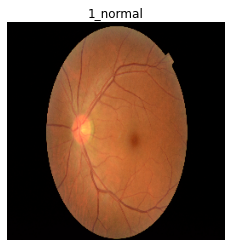

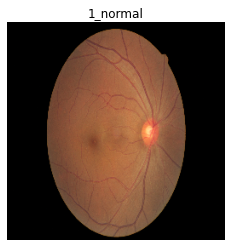

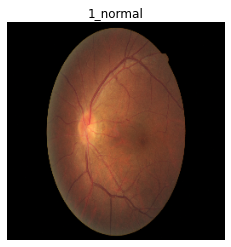

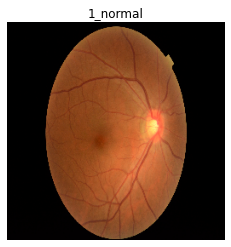

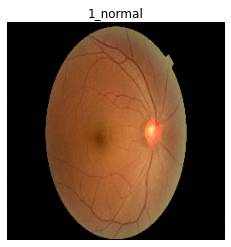

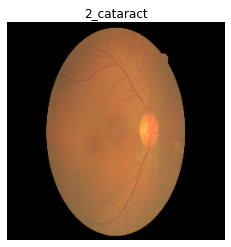

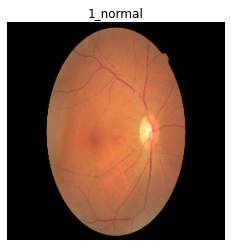

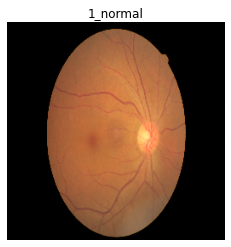

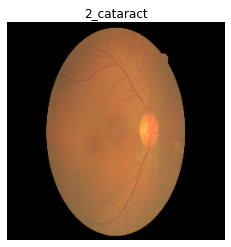

In [20]:
for i in range(1,10):
    r = np.random.randint(50)
    show(X[r],Y[r])

### Training and Validation split

In [21]:
"""
Splitting our dataset 20% for testing on unseen data and remaining 80%
for training and validation.
"""
split = int(X.shape[0]*0.8)

X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X_Train = X_[:split,:]
Y_Train = Y_[:split]

#X_Train = X_Train.reshape(len(X_Train),227,227,3)
#Y_Train = Y_Train.reshape(len(Y_Train),1)
Y_Train = np.asarray(Y_Train).astype('float32').reshape((-1,1))

#Y_Train = np.asarray(Y_Train).astype('float32').reshape((-1,1))


#Test Set
X_Test = X_[split:,:]
Y_Test = Y_[split:]

#X_Test = X_Test.reshape(len(X_Test),227,227,3)
#Y_Test = Y_Test.reshape(len(Y_Test),1)
Y_Test = np.asarray(Y_Test).astype('float32').reshape((-1,1))
#Y_Test = np.asarray(Y_Test).astype('float32').reshape((-1,1))

print("Shape of X_Train : ", X_Train.shape)
print("Shape of Y_Train : ", Y_Train.shape)
print("Shape of X_Test  : ", X_Test.shape)
print("Shape of Y_Test  : ", Y_Test.shape)

Shape of X_Train :  (160, 256, 256, 3)
Shape of Y_Train :  (160, 1)
Shape of X_Test  :  (40, 256, 256, 3)
Shape of Y_Test  :  (40, 1)


In [22]:
# create a sequential model
model = Sequential()

# 1st conv layer
model.add(Conv2D(filters=96,input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# first layer has 96 filters, the input shape is 227x227x3
# kernel size is 11x11, striding 4x4, ReLu is the activation function

# MaxPooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

# 2nd conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
# MaxPooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

# 3rd conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

# 4th conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

# 5th conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
# MaxPooling
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))

# flatten
model.add(Flatten())

# 1st FC layer 4096 neurons
model.add(Dense(4096,input_shape=(256*256*3,)))
model.add(Activation('relu'))

# adding dropout to regularize overfitting
#model.add(Dropout(0.4))

# 2nd FC layer
model.add(Dense(4096))
model.add(Activation('relu'))

# adding dropout to regularize overfitting
#model.add(Dropout(0.4))

# Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 activation_8 (Activation)   (None, 62, 62, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 activation_9 (Activation)   (None, 26, 26, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                  

In [26]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [27]:
model.fit(X_Train,Y_Train,epochs=50,batch_size=32)

Epoch 1/50
5/5 [==============================] - 12s 2s/step - loss: 2.1427 - accuracy: 0.6375
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 0.6840 - accuracy: 0.5938
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 0.5287 - accuracy: 0.7688
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 0.4489 - accuracy: 0.8188
Epoch 5/50
5/5 [==============================] - 10s 2s/step - loss: 0.3310 - accuracy: 0.8625
Epoch 6/50
5/5 [==============================] - 10s 2s/step - loss: 0.2929 - accuracy: 0.8938
Epoch 7/50
5/5 [==============================] - 10s 2s/step - loss: 0.3939 - accuracy: 0.8438
Epoch 8/50
5/5 [==============================] - 10s 2s/step - loss: 0.2218 - accuracy: 0.9125
Epoch 9/50
5/5 [==============================] - 10s 2s/step - loss: 0.2108 - accuracy: 0.9312
Epoch 10/50
5/5 [==============================] - 11s 2s/step - loss: 0.2407 - accuracy: 0.9250
Epoch 11/50
5/5 [=========================

highest acc - 95.63% train set  50th epoch using rmsprop optimizer


In [28]:
model.evaluate(X_Test,Y_Test)

2/2 [==============================] - 1s 136ms/step - loss: 0.8971 - accuracy: 0.8000


[0.8971349596977234, 0.800000011920929]

rms prop - test - 80% acc